lot를 모델에 워드 임베딩으로 넣어줌

임베딩을 추가했을때는 표준화모델이 더 나은것으로 보임



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 불러오기

In [3]:
!pwd

/content


In [4]:
!unzip '/content/drive/MyDrive/dataset/전해탈지.zip' -d ./

Archive:  /content/drive/MyDrive/dataset/전해탈지.zip
  inflating: ./data/Error Lot list.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.06.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.07.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.08.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.09.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.10.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.13.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.14.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.15.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.16.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.17.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.23.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.24.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.27.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.28.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.29.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.30.csv  
  inflating: ./data/kemp-abh-sensor-2021.10.01.csv  
  

data파일 안에 날짜별 csv가 한번에 들어있는 형태

Error Lot list를 타겟 파일로 해석


In [5]:
import pandas as pd

In [6]:
df_1 = pd.read_csv('/content/data/kemp-abh-sensor-2021.09.06.csv')

In [7]:
df_1

,Index,Lot,Time,pH,Temp,Current
0,1,1,오후 4:29:15.0,10.37,42.87,7.34
1,2,1,오후 4:29:20.0,10.90,42.70,8.26
2,3,1,오후 4:29:25.0,9.61,42.37,8.46
3,4,1,오후 4:29:30.0,10.32,45.85,8.04
4,5,1,오후 4:29:35.0,10.36,44.18,7.23
...,...,...,...,...,...,...
1513,1514,22,오후 6:43:02.1,10.00,45.46,7.78
1514,1515,22,오후 6:43:07.1,10.55,44.47,7.65
1515,1516,22,오후 6:43:12.1,9.80,45.34,7.08
1516,1517,22,오후 6:43:17.1,9.76,43.09,7.84


## error파일

In [8]:
df_err = pd.read_csv('/content/data/Error Lot list.csv')
df_err.head()

,Index,Date,LoT,LoT2
0,1,2021-09-06,NaN,NaN
1,2,2021-09-07,13.0,NaN
2,3,2021-09-08,1.0,22.0
3,4,2021-09-09,NaN,NaN
4,5,2021-09-10,NaN,NaN


In [9]:
df_err.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   33 non-null     int64  
 1   Date    33 non-null     object 
 2   LoT     13 non-null     float64
 3   LoT2    2 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ KB


In [10]:
df_err = df_err.fillna(0)

In [11]:
df_err['LoT'] = df_err['LoT'].astype('int')
df_err['LoT2'] = df_err['LoT2'].astype('int')

In [12]:
df_err.info

<bound method DataFrame.info of     Index        Date  LoT  LoT2
0       1  2021-09-06    0     0
1       2  2021-09-07   13     0
2       3  2021-09-08    1    22
3       4  2021-09-09    0     0
4       5  2021-09-10    0     0
5       6  2021-09-13    0     0
6       7  2021-09-14    5     0
7       8  2021-09-15    5     0
8       9  2021-09-16    0     0
9      10  2021-09-17    0     0
10     11  2021-09-23   13     0
11     12  2021-09-24    0     0
12     13  2021-09-27    0     0
13     14  2021-09-28    0     0
14     15  2021-09-29    9     0
15     16  2021-09-30    0     0
16     17  2021-10-01    8     0
17     18  2021-10-05   17     0
18     19  2021-10-06   19     0
19     20  2021-10-07    0     0
20     21  2021-10-08   14     0
21     22  2021-10-12    0     0
22     23  2021-10-13    0     0
23     24  2021-10-14    0     0
24     25  2021-10-15    0     0
25     26  2021-10-18    5    22
26     27  2021-10-19    0     0
27     28  2021-10-20    0     0
28     29  

### column 추가 예시

In [13]:
df_1['date'] = '2021.09.06'

In [14]:
df_1

,Index,Lot,Time,pH,Temp,Current,date
0,1,1,오후 4:29:15.0,10.37,42.87,7.34,2021.09.06
1,2,1,오후 4:29:20.0,10.90,42.70,8.26,2021.09.06
2,3,1,오후 4:29:25.0,9.61,42.37,8.46,2021.09.06
3,4,1,오후 4:29:30.0,10.32,45.85,8.04,2021.09.06
4,5,1,오후 4:29:35.0,10.36,44.18,7.23,2021.09.06
...,...,...,...,...,...,...,...
1513,1514,22,오후 6:43:02.1,10.00,45.46,7.78,2021.09.06
1514,1515,22,오후 6:43:07.1,10.55,44.47,7.65,2021.09.06
1515,1516,22,오후 6:43:12.1,9.80,45.34,7.08,2021.09.06
1516,1517,22,오후 6:43:17.1,9.76,43.09,7.84,2021.09.06


# 데이터 합치기

### os.listdir
'data' 파일 안에 있는 모든 파일이름 리스트로 생성

In [15]:
import os

In [16]:
oslist = os.listdir('data')
oslist.sort()
oslist.pop(0)
oslist

['kemp-abh-sensor-2021.09.06.csv',
 'kemp-abh-sensor-2021.09.07.csv',
 'kemp-abh-sensor-2021.09.08.csv',
 'kemp-abh-sensor-2021.09.09.csv',
 'kemp-abh-sensor-2021.09.10.csv',
 'kemp-abh-sensor-2021.09.13.csv',
 'kemp-abh-sensor-2021.09.14.csv',
 'kemp-abh-sensor-2021.09.15.csv',
 'kemp-abh-sensor-2021.09.16.csv',
 'kemp-abh-sensor-2021.09.17.csv',
 'kemp-abh-sensor-2021.09.23.csv',
 'kemp-abh-sensor-2021.09.24.csv',
 'kemp-abh-sensor-2021.09.27.csv',
 'kemp-abh-sensor-2021.09.28.csv',
 'kemp-abh-sensor-2021.09.29.csv',
 'kemp-abh-sensor-2021.09.30.csv',
 'kemp-abh-sensor-2021.10.01.csv',
 'kemp-abh-sensor-2021.10.05.csv',
 'kemp-abh-sensor-2021.10.06.csv',
 'kemp-abh-sensor-2021.10.07.csv',
 'kemp-abh-sensor-2021.10.08.csv',
 'kemp-abh-sensor-2021.10.12.csv',
 'kemp-abh-sensor-2021.10.13.csv',
 'kemp-abh-sensor-2021.10.14.csv',
 'kemp-abh-sensor-2021.10.15.csv',
 'kemp-abh-sensor-2021.10.18.csv',
 'kemp-abh-sensor-2021.10.19.csv',
 'kemp-abh-sensor-2021.10.20.csv',
 'kemp-abh-sensor-20

In [17]:
len(oslist)

33

In [18]:
oslist[0][16:26]

'2021.09.06'

In [19]:
oslists = []

for i in range(len(oslist)):
  if len(oslist[i]) > 26:
    oslists.append(oslist[i][16:26])

In [20]:
oslists.sort()

In [21]:
oslists

['2021.09.06',
 '2021.09.07',
 '2021.09.08',
 '2021.09.09',
 '2021.09.10',
 '2021.09.13',
 '2021.09.14',
 '2021.09.15',
 '2021.09.16',
 '2021.09.17',
 '2021.09.23',
 '2021.09.24',
 '2021.09.27',
 '2021.09.28',
 '2021.09.29',
 '2021.09.30',
 '2021.10.01',
 '2021.10.05',
 '2021.10.06',
 '2021.10.07',
 '2021.10.08',
 '2021.10.12',
 '2021.10.13',
 '2021.10.14',
 '2021.10.15',
 '2021.10.18',
 '2021.10.19',
 '2021.10.20',
 '2021.10.21',
 '2021.10.22',
 '2021.10.25',
 '2021.10.26',
 '2021.10.27']

In [22]:
for i in range(len(oslists)):
  oslists[i] = oslists[i].replace('.','-')

In [23]:
oslists

['2021-09-06',
 '2021-09-07',
 '2021-09-08',
 '2021-09-09',
 '2021-09-10',
 '2021-09-13',
 '2021-09-14',
 '2021-09-15',
 '2021-09-16',
 '2021-09-17',
 '2021-09-23',
 '2021-09-24',
 '2021-09-27',
 '2021-09-28',
 '2021-09-29',
 '2021-09-30',
 '2021-10-01',
 '2021-10-05',
 '2021-10-06',
 '2021-10-07',
 '2021-10-08',
 '2021-10-12',
 '2021-10-13',
 '2021-10-14',
 '2021-10-15',
 '2021-10-18',
 '2021-10-19',
 '2021-10-20',
 '2021-10-21',
 '2021-10-22',
 '2021-10-25',
 '2021-10-26',
 '2021-10-27']

In [24]:
import glob as gl

In [25]:
Path = gl.glob('/content/data/kemp-abh-sensor-*.csv')
Path.sort()
Path

['/content/data/kemp-abh-sensor-2021.09.06.csv',
 '/content/data/kemp-abh-sensor-2021.09.07.csv',
 '/content/data/kemp-abh-sensor-2021.09.08.csv',
 '/content/data/kemp-abh-sensor-2021.09.09.csv',
 '/content/data/kemp-abh-sensor-2021.09.10.csv',
 '/content/data/kemp-abh-sensor-2021.09.13.csv',
 '/content/data/kemp-abh-sensor-2021.09.14.csv',
 '/content/data/kemp-abh-sensor-2021.09.15.csv',
 '/content/data/kemp-abh-sensor-2021.09.16.csv',
 '/content/data/kemp-abh-sensor-2021.09.17.csv',
 '/content/data/kemp-abh-sensor-2021.09.23.csv',
 '/content/data/kemp-abh-sensor-2021.09.24.csv',
 '/content/data/kemp-abh-sensor-2021.09.27.csv',
 '/content/data/kemp-abh-sensor-2021.09.28.csv',
 '/content/data/kemp-abh-sensor-2021.09.29.csv',
 '/content/data/kemp-abh-sensor-2021.09.30.csv',
 '/content/data/kemp-abh-sensor-2021.10.01.csv',
 '/content/data/kemp-abh-sensor-2021.10.05.csv',
 '/content/data/kemp-abh-sensor-2021.10.06.csv',
 '/content/data/kemp-abh-sensor-2021.10.07.csv',
 '/content/data/kemp

## train / test 나누기
- train 0.6
- valid 0.2
- test 0.2

In [26]:
len(Path)

33

In [27]:
len(Path[:19])
Path_train = Path[:19]
# Path_train

In [28]:
len(Path[19:26])
Path_val = Path[19:26]
# Path_val

In [29]:
len(Path[26:])
Path_test = Path[26:]
# Path_test

## 새로운 columns 추가 & 데이터 병합

- date 날짜
- err 에러 발생여부

In [30]:
df_err.loc[df_err['Index']==1, 'Date']

0    2021-09-06
Name: Date, dtype: object

In [31]:
df_err['Date'][0]

'2021-09-06'

## 전체 데이터

In [32]:
df = pd.read_csv('%s' % Path[0])
df['date'] = oslists[0]
df['err'] = 0

for i in range(1, len(Path)):
  df_a = pd.read_csv('%s' % Path[i])
  df_a['date'] = oslists[i]
  # df_a['date'] = df_a['date'].apply(lambda x: x.replace('.','-'))
  df_a['err'] = 0
  df_a.loc[df_a.loc[df_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT'][i], 'err'] = 1
  df_a.loc[df_a.loc[df_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT2'][i], 'err'] = 1
  df = pd.concat([df, df_a])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50094 entries, 0 to 1517
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Index    50094 non-null  int64  
 1   Lot      50094 non-null  int64  
 2   Time     50094 non-null  object 
 3   pH       50094 non-null  float64
 4   Temp     50094 non-null  float64
 5   Current  50094 non-null  float64
 6   date     50094 non-null  object 
 7   err      50094 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 3.4+ MB


In [34]:
df

,Index,Lot,Time,pH,Temp,Current,date,err
0,1,1,오후 4:29:15.0,10.37,42.87,7.34,2021-09-06,0
1,2,1,오후 4:29:20.0,10.90,42.70,8.26,2021-09-06,0
2,3,1,오후 4:29:25.0,9.61,42.37,8.46,2021-09-06,0
3,4,1,오후 4:29:30.0,10.32,45.85,8.04,2021-09-06,0
4,5,1,오후 4:29:35.0,10.36,44.18,7.23,2021-09-06,0
...,...,...,...,...,...,...,...,...
1513,1514,22,오후 6:39:05.9,9.79,43.52,8.55,2021-10-27,0
1514,1515,22,오후 6:39:10.9,9.53,44.44,7.36,2021-10-27,0
1515,1516,22,오후 6:39:15.9,9.86,46.54,8.15,2021-10-27,0
1516,1517,22,오후 6:39:20.9,10.52,47.88,7.97,2021-10-27,0


In [35]:
df.Lot = df.Lot.astype(str)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50094 entries, 0 to 1517
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Index    50094 non-null  int64  
 1   Lot      50094 non-null  object 
 2   Time     50094 non-null  object 
 3   pH       50094 non-null  float64
 4   Temp     50094 non-null  float64
 5   Current  50094 non-null  float64
 6   date     50094 non-null  object 
 7   err      50094 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 3.4+ MB


## 데이터 나누기

In [37]:
train = pd.read_csv('%s' % Path_train[0])
train['date'] = oslists[0]
train['err'] = 0

for i in range(1, 19):
  train_a = pd.read_csv('%s' % Path[i])
  train_a['date'] = oslists[i]
  # train_a['date'] = train_a['date'].apply(lambda x: x.replace('.','-'))
  train_a['err'] = 0
  train_a.loc[train_a.loc[train_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT'][i], 'err'] = 1
  train_a.loc[train_a.loc[train_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT2'][i], 'err'] = 1
  train = pd.concat([train, train_a])

In [38]:
train.loc[train['err'] == 1, 'Lot'].unique()

array([13,  1, 22,  5,  9,  8, 17, 19])

In [39]:
train

,Index,Lot,Time,pH,Temp,Current,date,err
0,1,1,오후 4:29:15.0,10.37,42.87,7.34,2021-09-06,0
1,2,1,오후 4:29:20.0,10.90,42.70,8.26,2021-09-06,0
2,3,1,오후 4:29:25.0,9.61,42.37,8.46,2021-09-06,0
3,4,1,오후 4:29:30.0,10.32,45.85,8.04,2021-09-06,0
4,5,1,오후 4:29:35.0,10.36,44.18,7.23,2021-09-06,0
...,...,...,...,...,...,...,...,...
1513,1514,22,오후 6:37:01.1,10.52,46.39,8.19,2021-10-06,0
1514,1515,22,오후 6:37:06.1,10.55,44.08,7.55,2021-10-06,0
1515,1516,22,오후 6:37:11.2,10.18,45.32,8.03,2021-10-06,0
1516,1517,22,오후 6:37:16.2,10.62,46.60,7.12,2021-10-06,0


In [40]:
# train.Lot = train.Lot.astype(str)
# train.info()

In [41]:
val = pd.read_csv('%s' % Path_val[0])
val['date'] = oslists[19]
val['err'] = 0

for i in range(19, 26):
  val_a = pd.read_csv('%s' % Path[i])
  val_a['date'] = oslists[i]
  # val_a['date'] = val_a['date'].apply(lambda x: x.replace('.','-'))
  val_a['err'] = 0
  val_a.loc[val_a.loc[val_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT'][i], 'err'] = 1
  val_a.loc[val_a.loc[val_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT2'][i], 'err'] = 1
  val = pd.concat([val, val_a])

In [42]:
val.loc[val['err'] == 1, 'Lot'].unique()

array([14,  5, 22])

In [43]:
val

,Index,Lot,Time,pH,Temp,Current,date,err
0,1,1,오후 4:26:14.0,10.07,46.81,7.97,2021-10-07,0
1,2,1,오후 4:26:19.0,10.73,47.47,8.85,2021-10-07,0
2,3,1,오후 4:26:24.0,10.81,43.07,8.52,2021-10-07,0
3,4,1,오후 4:26:29.0,10.87,46.87,7.12,2021-10-07,0
4,5,1,오후 4:26:34.0,9.86,45.81,7.91,2021-10-07,0
...,...,...,...,...,...,...,...,...
1513,1514,22,오후 6:33:52.1,10.34,46.59,7.75,2021-10-18,1
1514,1515,22,오후 6:33:57.1,10.74,46.58,8.87,2021-10-18,1
1515,1516,22,오후 6:34:02.1,10.92,42.91,7.48,2021-10-18,1
1516,1517,22,오후 6:34:07.1,9.97,47.78,7.80,2021-10-18,1


In [44]:
# val.Lot = val.Lot.astype(str)
# val.info()

In [45]:
test = pd.read_csv('%s' % Path_test[0])
test['date'] = oslists[26]
test['err'] = 0

for i in range(26, 33):
  test_a = pd.read_csv('%s' % Path[i])
  test_a['date'] = oslists[i]
  # test_a['date'] = test_a['date'].apply(lambda x: x.replace('.','-'))
  test_a['err'] = 0
  test_a.loc[test_a.loc[test_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT'][i], 'err'] = 1
  test_a.loc[test_a.loc[test_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT2'][i], 'err'] = 1
  test = pd.concat([test, test_a])

In [46]:
test.loc[test['err'] == 1, 'Lot'].unique()

array([19, 15])

In [47]:
test

,Index,Lot,Time,pH,Temp,Current,date,err
0,1,1,오후 4:22:37.0,10.93,43.86,7.44,2021-10-19,0
1,2,1,오후 4:22:42.0,10.59,43.39,8.58,2021-10-19,0
2,3,1,오후 4:22:47.0,9.78,45.50,8.59,2021-10-19,0
3,4,1,오후 4:22:52.0,10.53,45.31,8.23,2021-10-19,0
4,5,1,오후 4:22:57.0,10.24,46.65,8.96,2021-10-19,0
...,...,...,...,...,...,...,...,...
1513,1514,22,오후 6:39:05.9,9.79,43.52,8.55,2021-10-27,0
1514,1515,22,오후 6:39:10.9,9.53,44.44,7.36,2021-10-27,0
1515,1516,22,오후 6:39:15.9,9.86,46.54,8.15,2021-10-27,0
1516,1517,22,오후 6:39:20.9,10.52,47.88,7.97,2021-10-27,0


In [48]:
# test.Lot = test.Lot.astype(str)
# test.info()

# 데이터 정규화
- sigmoid 네트워크 뉴런의 일반적인 활성화함수는 [-1,1], [0,1] 간격

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
mmscaler = MinMaxScaler()

df_copy = df.copy()
train_copy = train.copy()
val_copy = val.copy()
test_copy = test.copy()

def normalize(dataframe):
  dataframe['pH'] = mmscaler.fit_transform(dataframe.pH.values.reshape(-1,1))
  dataframe['Temp'] = mmscaler.fit_transform(dataframe.Temp.values.reshape(-1,1))
  dataframe['Current'] = mmscaler.fit_transform(dataframe.Current.values.reshape(-1,1))
  return dataframe

train_sc = normalize(train_copy)
val_sc = normalize(val_copy)
test_sc = normalize(test_copy)
df_sc = normalize(df_copy)

In [51]:
train_sc

,Index,Lot,Time,pH,Temp,Current,date,err
0,1,1,오후 4:29:15.0,0.346774,0.087133,0.525862,2021-09-06,0
1,2,1,오후 4:29:20.0,0.560484,0.069909,0.790230,2021-09-06,0
2,3,1,오후 4:29:25.0,0.040323,0.036474,0.847701,2021-09-06,0
3,4,1,오후 4:29:30.0,0.326613,0.389058,0.727011,2021-09-06,0
4,5,1,오후 4:29:35.0,0.342742,0.219858,0.494253,2021-09-06,0
...,...,...,...,...,...,...,...,...
1513,1514,22,오후 6:37:01.1,0.407258,0.443769,0.770115,2021-10-06,0
1514,1515,22,오후 6:37:06.1,0.419355,0.209726,0.586207,2021-10-06,0
1515,1516,22,오후 6:37:11.2,0.270161,0.335360,0.724138,2021-10-06,0
1516,1517,22,오후 6:37:16.2,0.447581,0.465046,0.462644,2021-10-06,0


### x, y 데이터 나누기
- x : 'Lot', 'pH', 'Temp', 'Current'
- y : 'err'

In [52]:
df_sc.columns

Index(['Index', 'Lot', 'Time', 'pH', 'Temp', 'Current', 'date', 'err'], dtype='object')

In [53]:
df_x = df_sc.drop(columns = ['Index', 'Time', 'date', 'err'])
train_x = train_sc.drop(columns = ['Index', 'Time', 'date', 'err'])
val_x = val_sc.drop(columns = ['Index', 'Time', 'date', 'err'])
test_x = test_sc.drop(columns = ['Index', 'Time', 'date', 'err'])

In [54]:
df_y = df_sc.drop(columns = ['Index', 'Lot', 'Time', 'pH', 'Temp', 'Current', 'date'])
train_y = train_sc.drop(columns = ['Index', 'Lot', 'Time', 'pH', 'Temp', 'Current', 'date'])
val_y = val_sc.drop(columns = ['Index', 'Lot', 'Time', 'pH', 'Temp', 'Current', 'date'])
test_y = test_sc.drop(columns = ['Index', 'Lot', 'Time', 'pH', 'Temp', 'Current', 'date'])

# plot

In [55]:
import matplotlib.pyplot as plt

In [56]:
len(df.loc[df['Lot']==str(22)])/69

33.0

## 전체데이터 Lot별 plot

In [57]:
df_eplot = df.loc[df['Lot']==str(1)]
len(df_eplot)

2277

In [58]:
df_eplot['Index']

0      1
1      2
2      3
3      4
4      5
      ..
64    65
65    66
66    67
67    68
68    69
Name: Index, Length: 2277, dtype: int64

In [61]:
import numpy as np

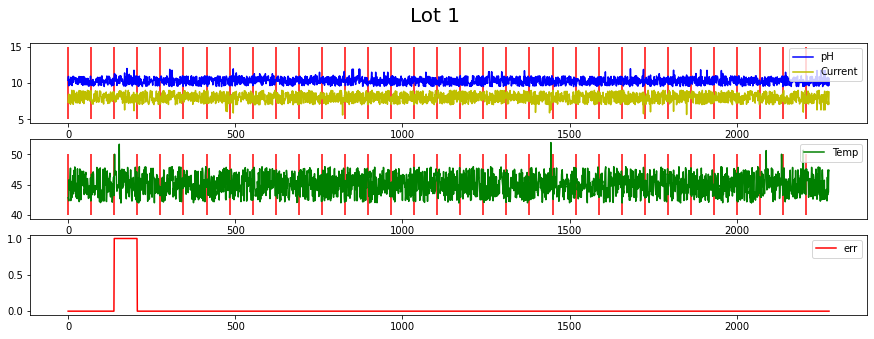

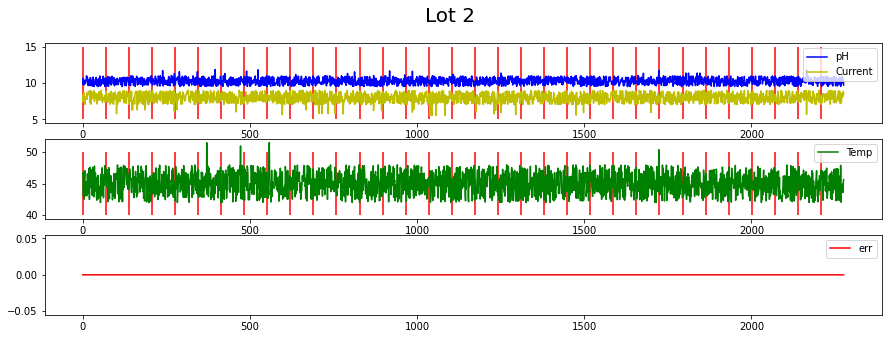

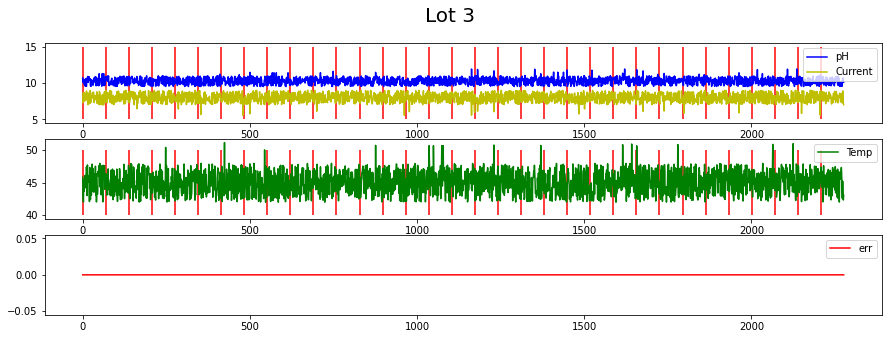

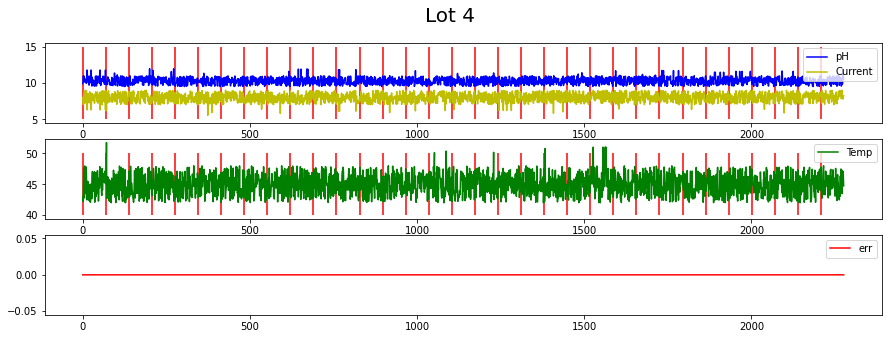

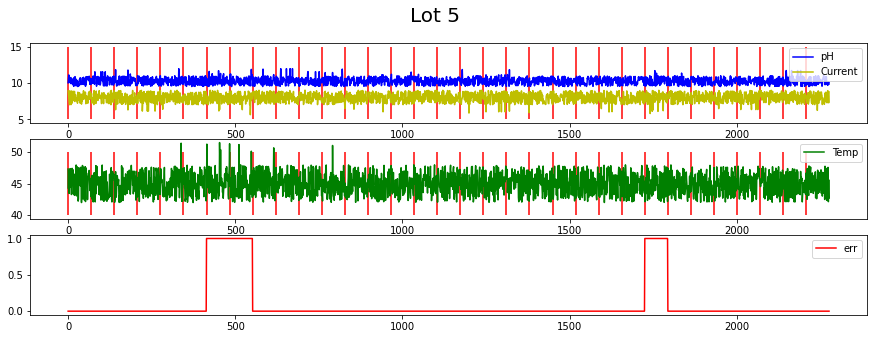

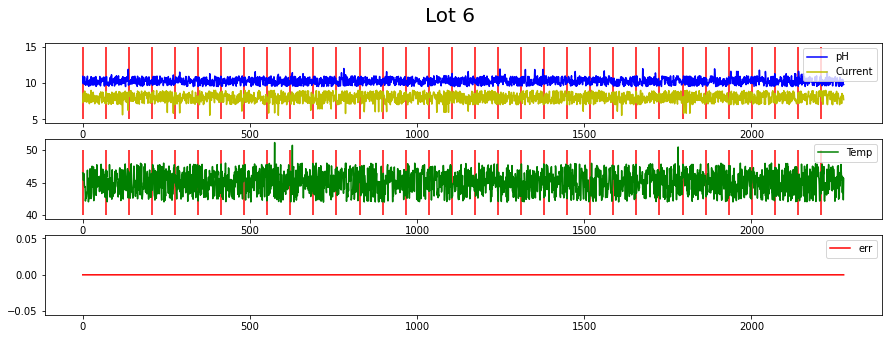

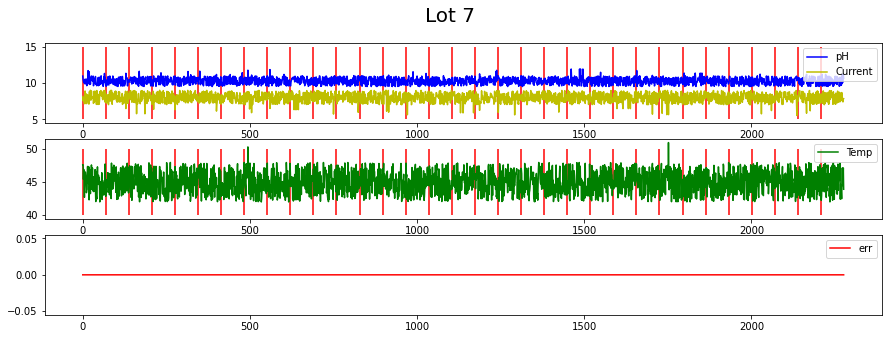

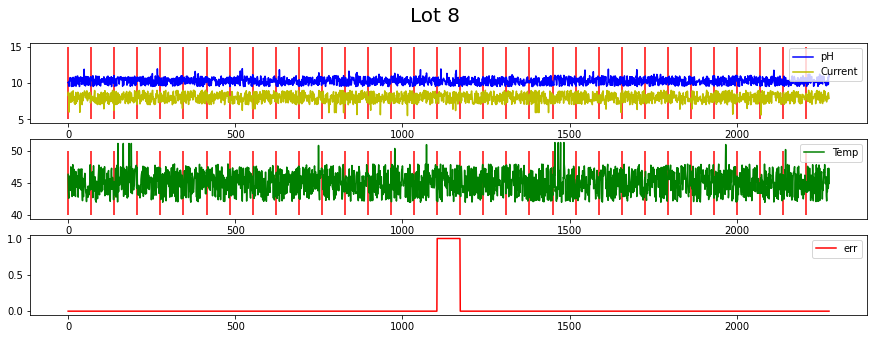

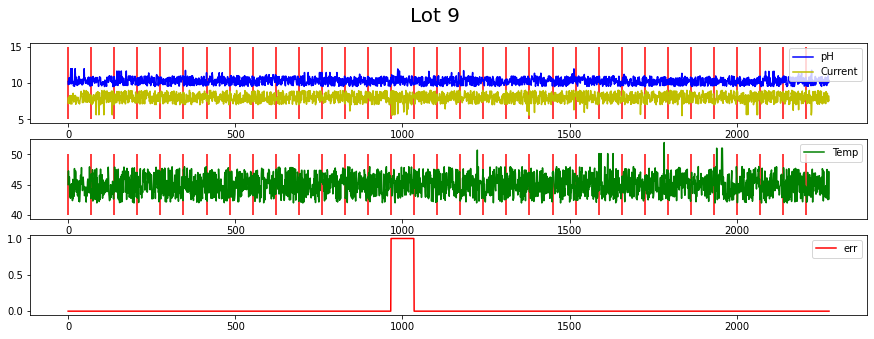

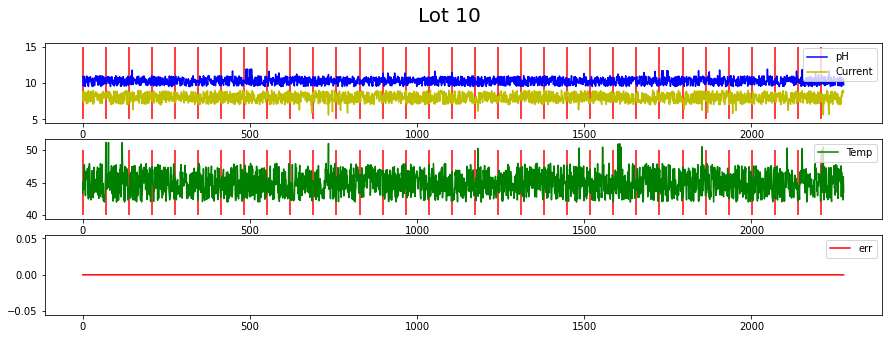

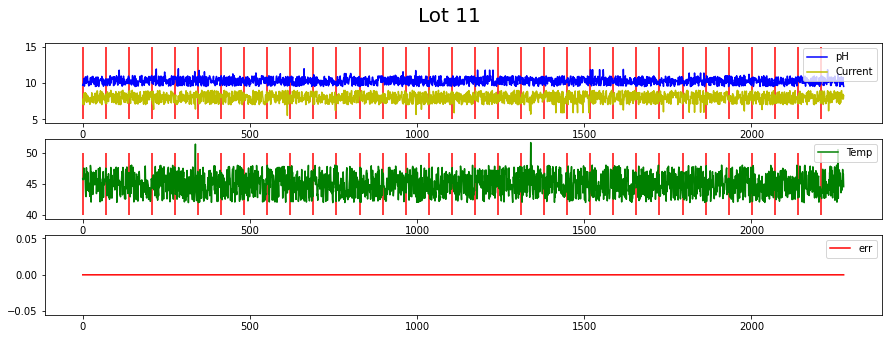

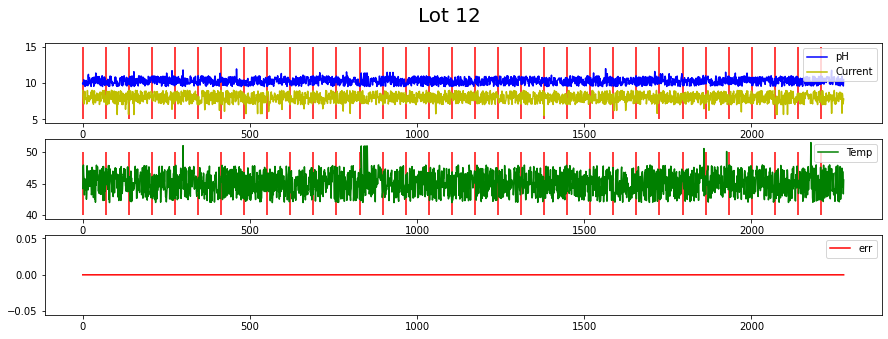

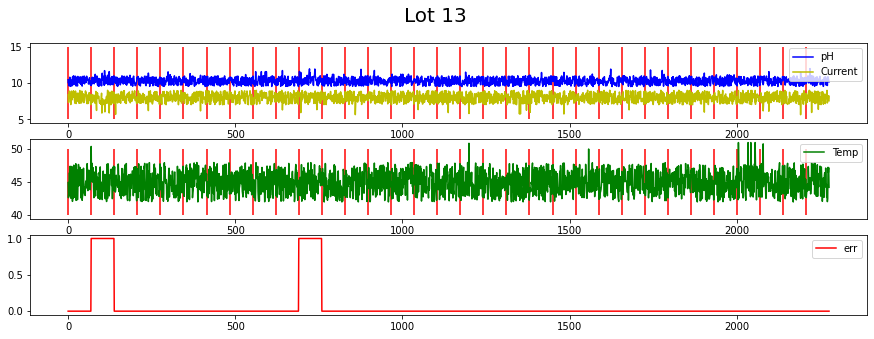

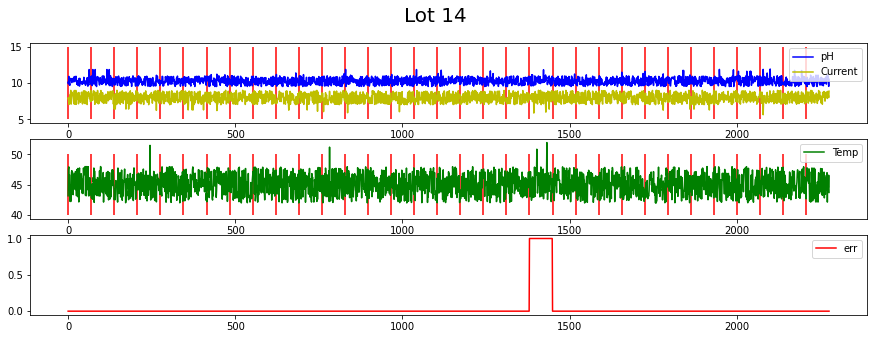

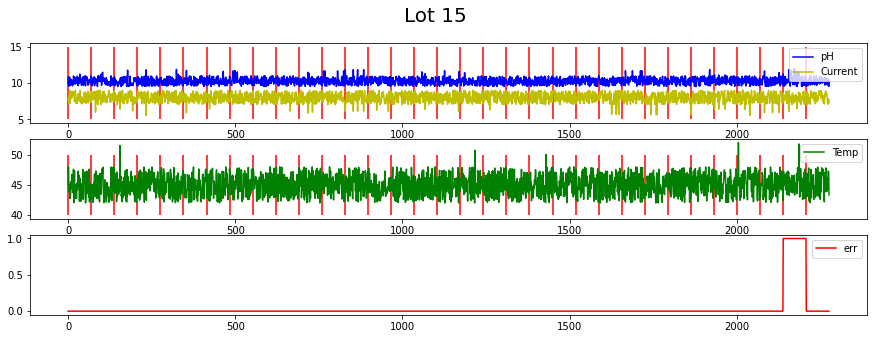

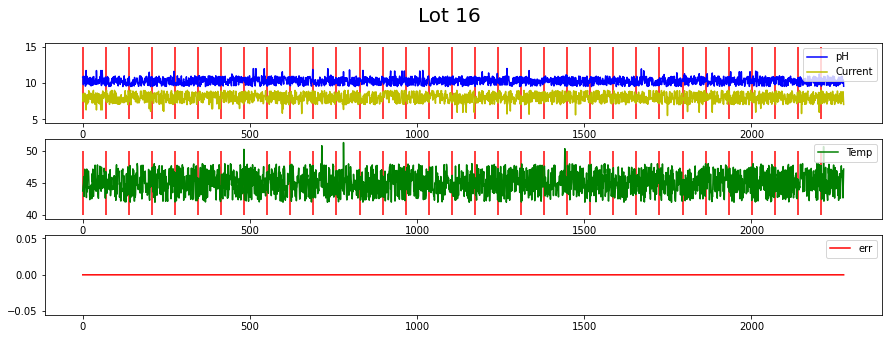

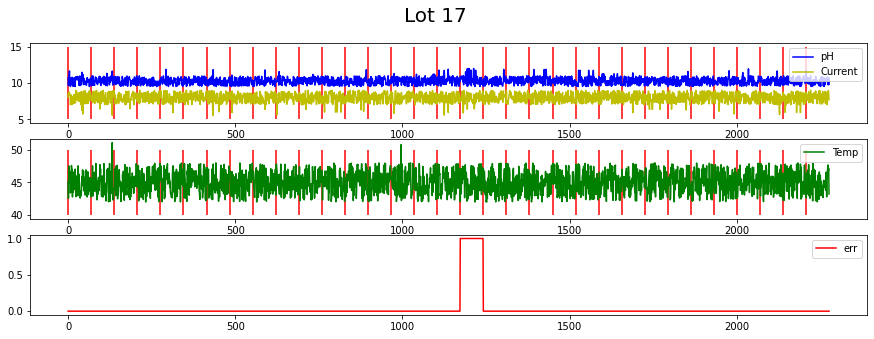

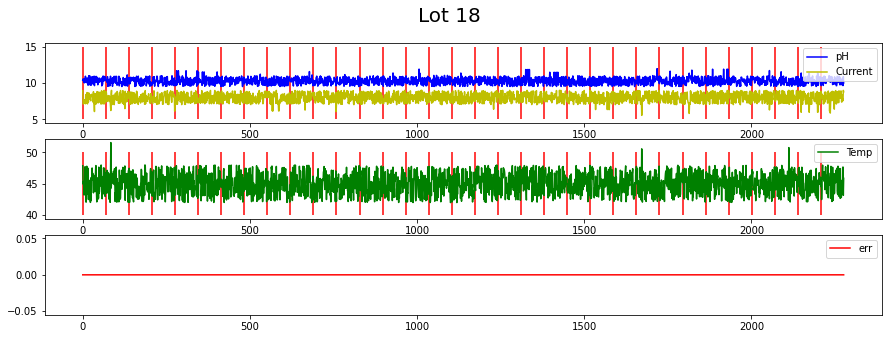

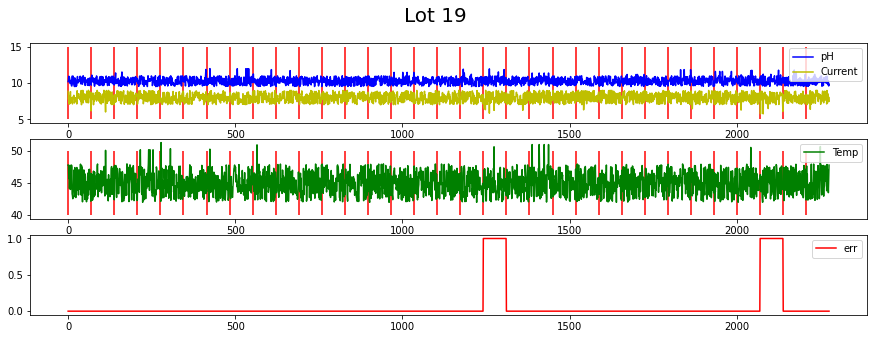

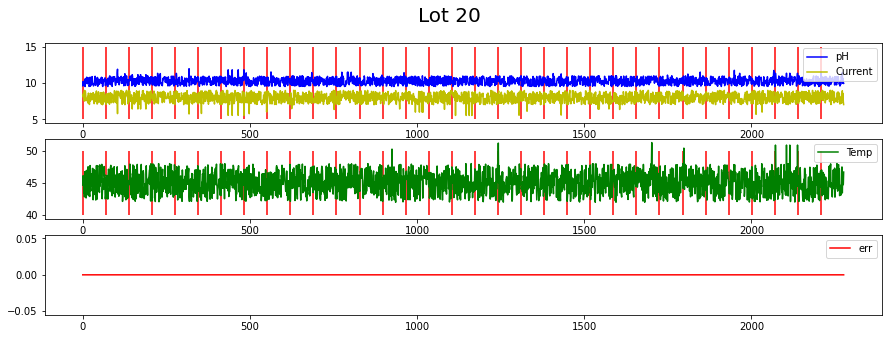

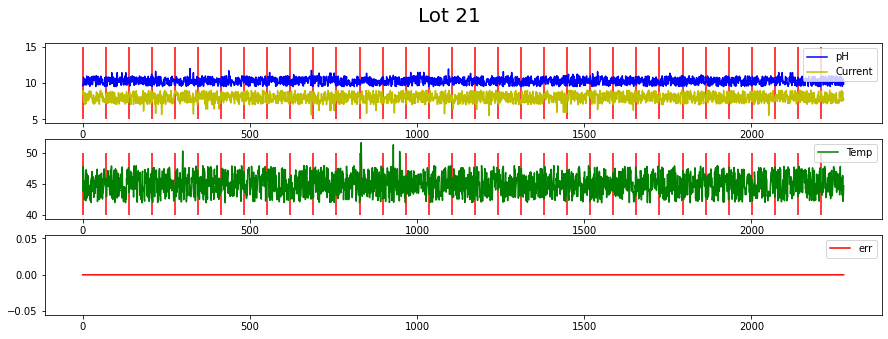

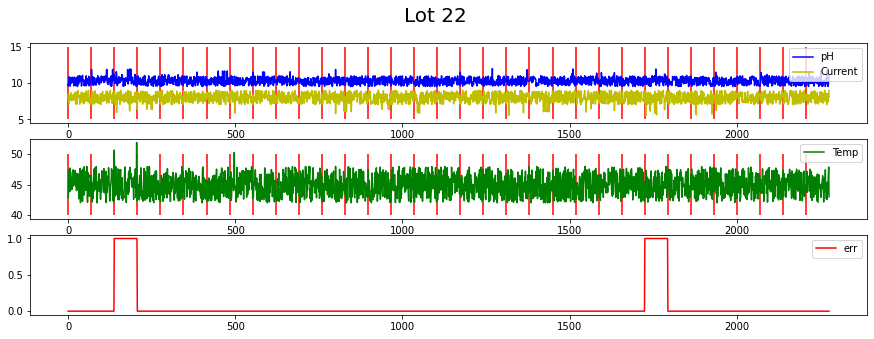

In [62]:
for i in range(1,len(df['Lot'].unique())+1):
  df_eplot = df.loc[df['Lot']==str(i)].reset_index()
  df_eplot['Index'] = np.arange(0,len(df_eplot))

  f, axes = plt.subplots(3)
  f.set_size_inches((15, 5))
  f.suptitle('Lot %s' % i, fontsize = 20)

  axes[0].plot(df_eplot['Index'], df_eplot['pH'], 'b', label='pH')
  axes[0].plot(df_eplot['Index'], df_eplot['Current'], 'y', label='Current')
  axes[0].legend(loc = 'upper right')

  for i in range(0, len(df_eplot), 69):
    axes[0].vlines(df_eplot['Index'][i], 5, 15, color='red')

  axes[1].plot(df_eplot['Index'], df_eplot['Temp'], 'g', label='Temp')
  axes[1].legend(loc = 'upper right')

  for i in range(0, len(df_eplot), 69):
    axes[1].vlines(df_eplot['Index'][i], 40, 50, color='red')

  axes[2].plot(df_eplot['Index'], df_eplot['err'], 'r', label='err')
  axes[2].legend(loc = 'upper right')

  plt.show()

## 정규화 전체데이터 Lot별 plot

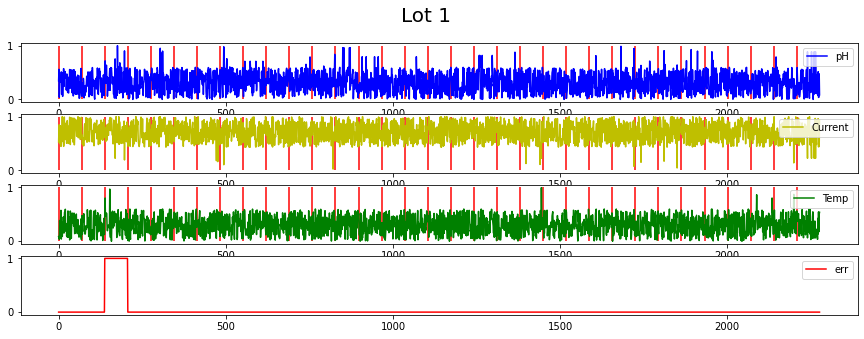

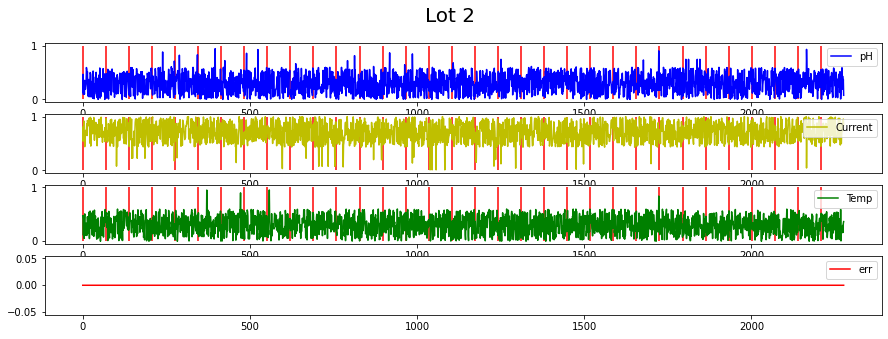

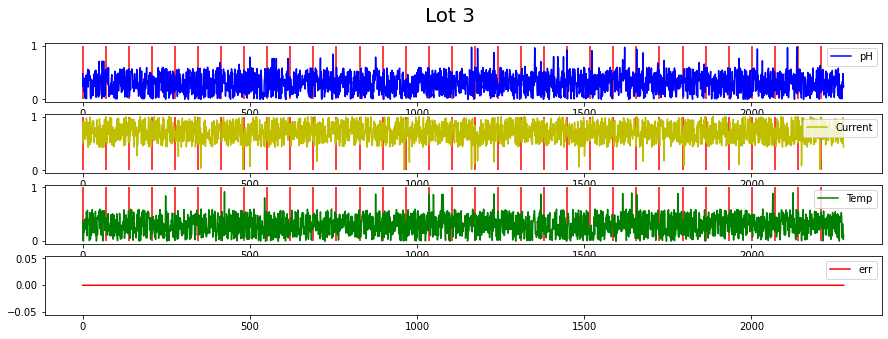

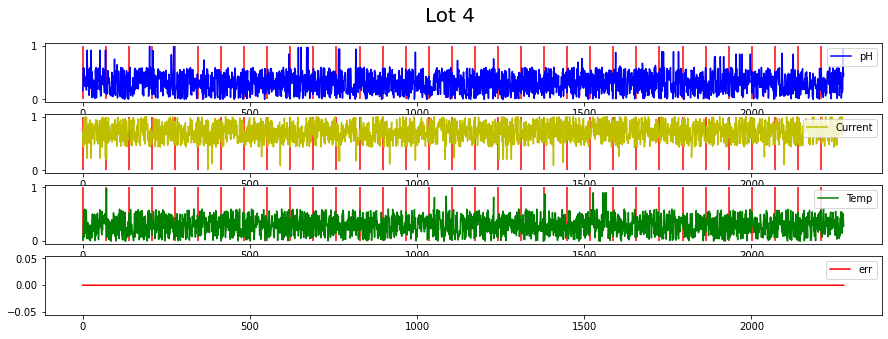

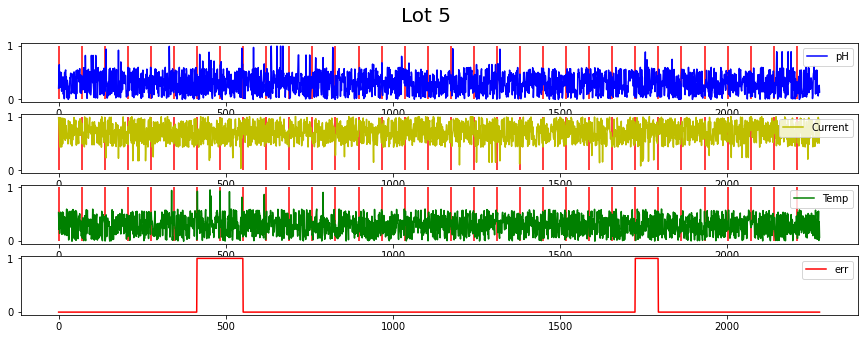

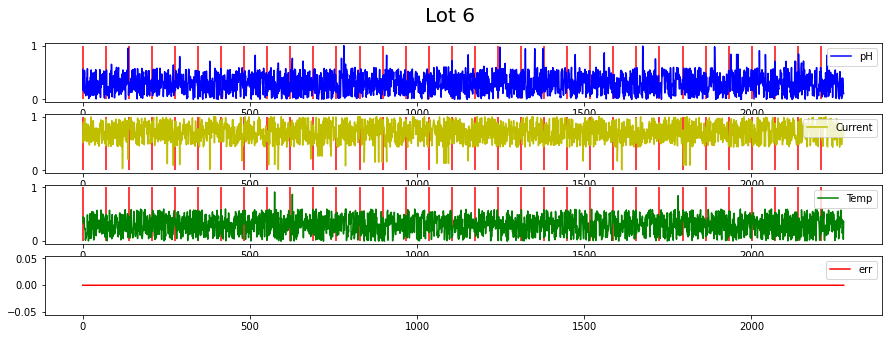

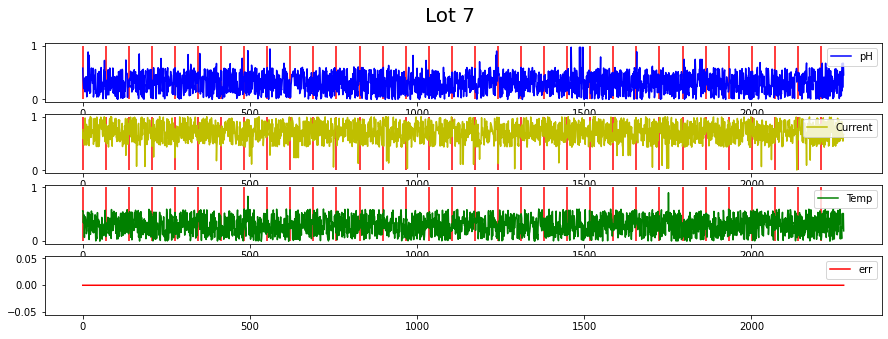

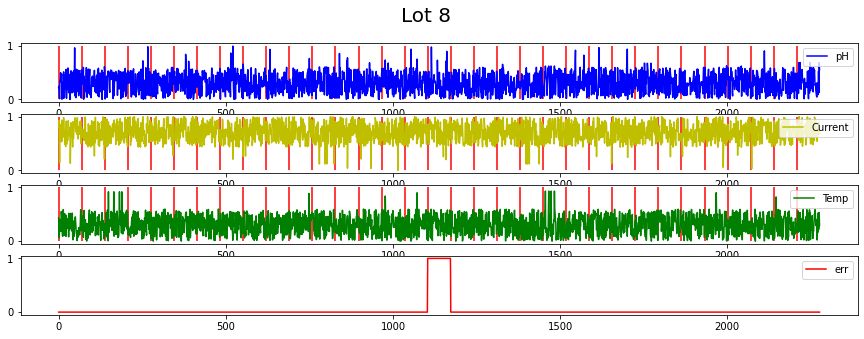

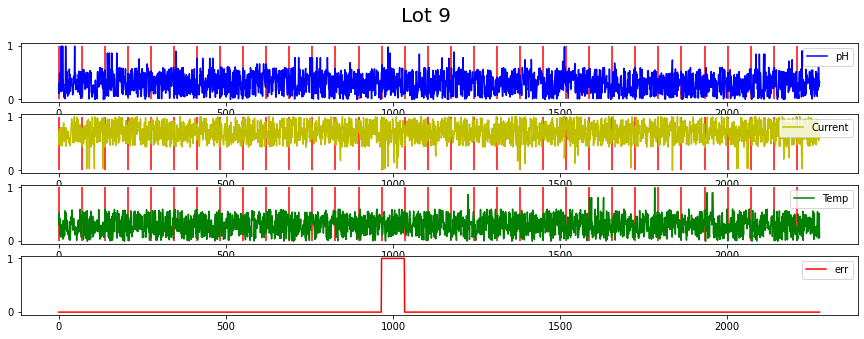

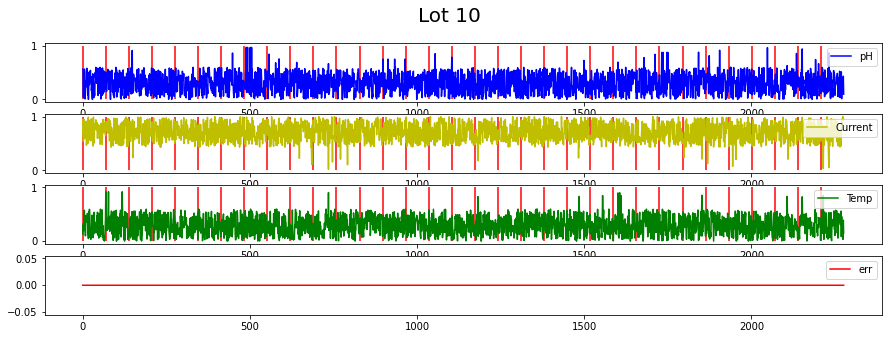

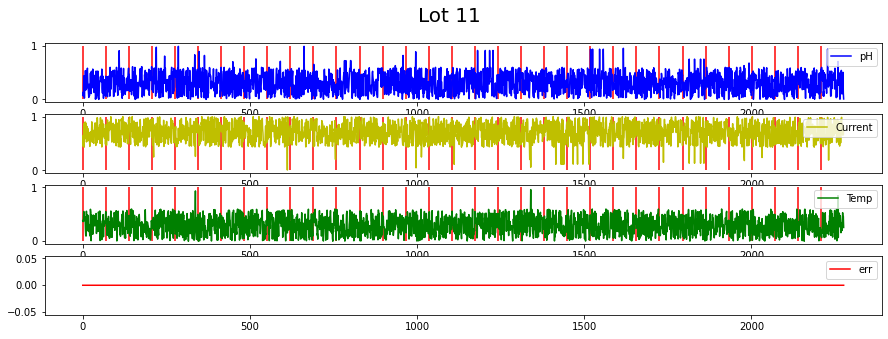

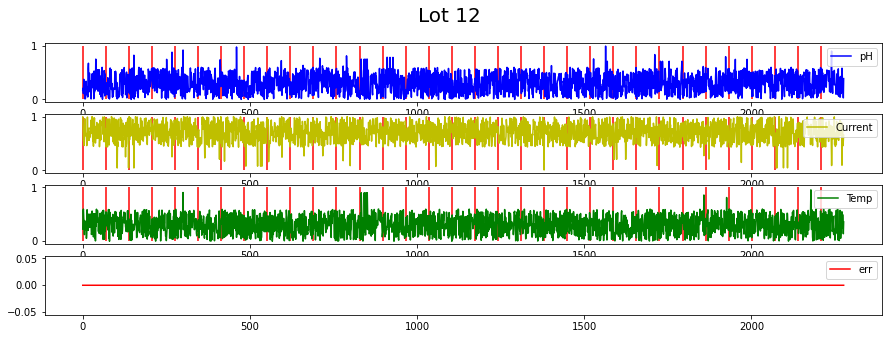

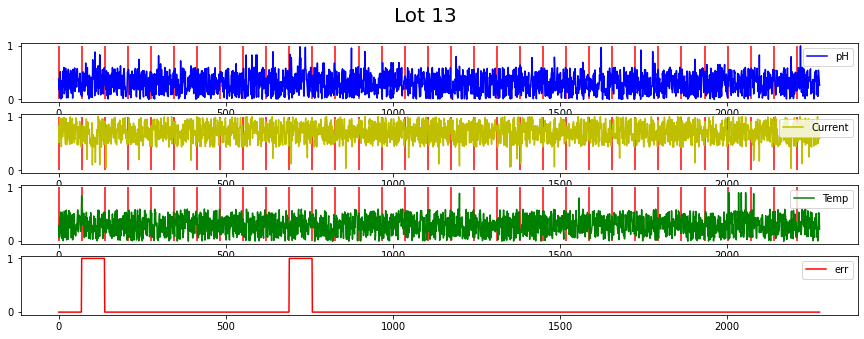

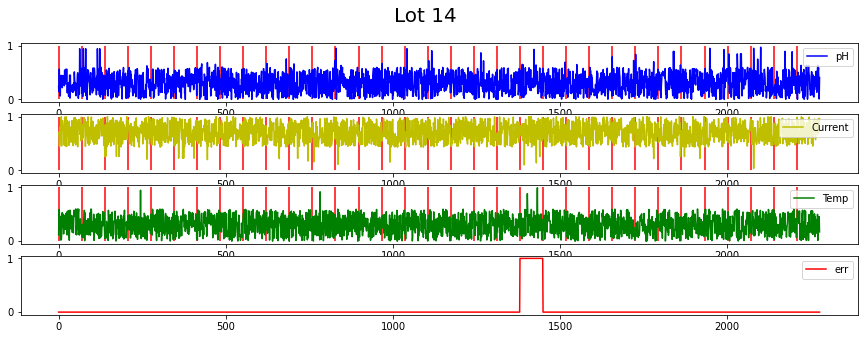

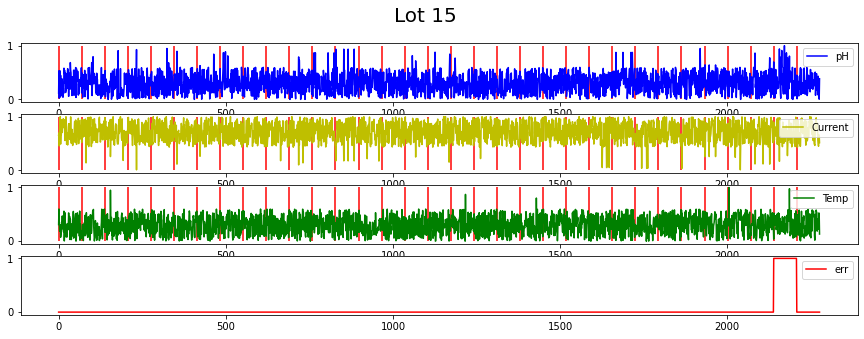

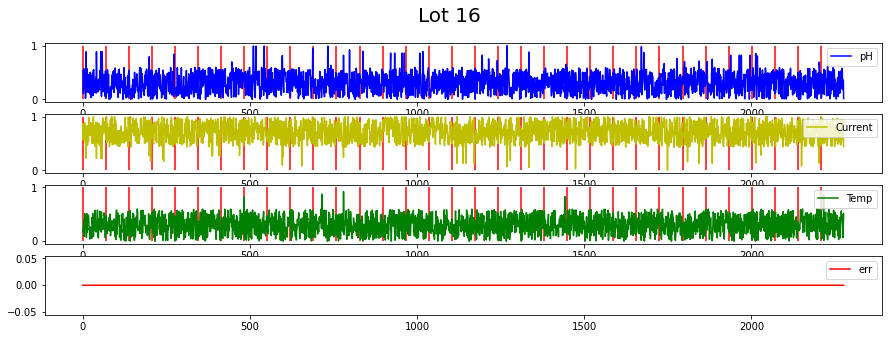

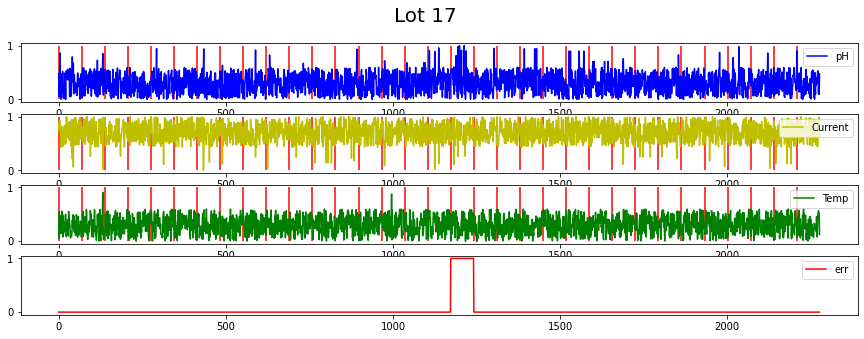

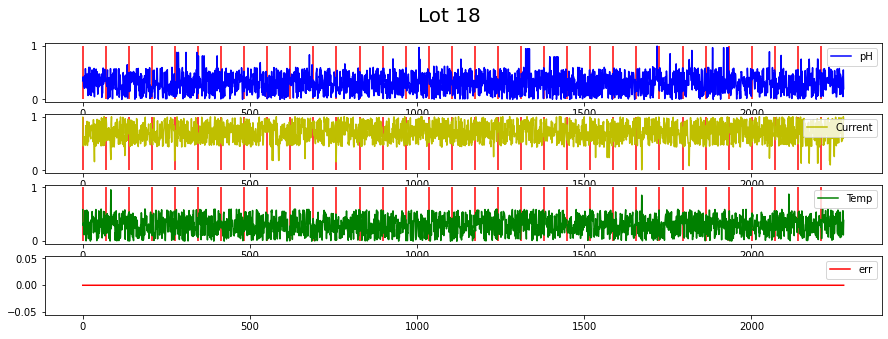

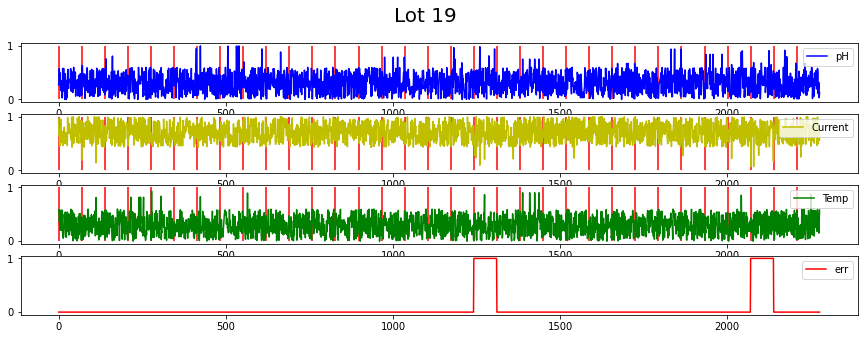

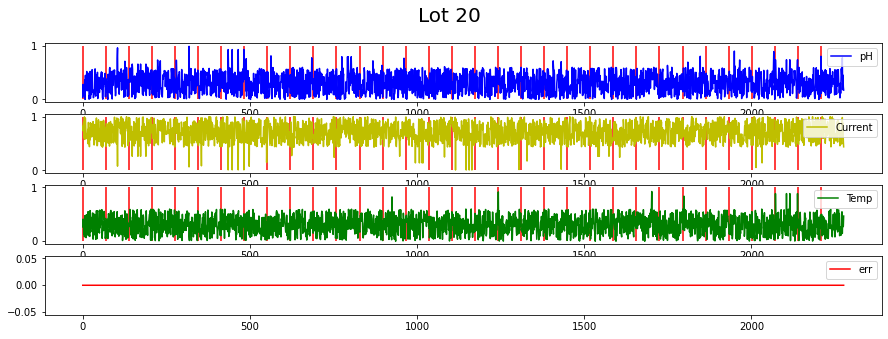

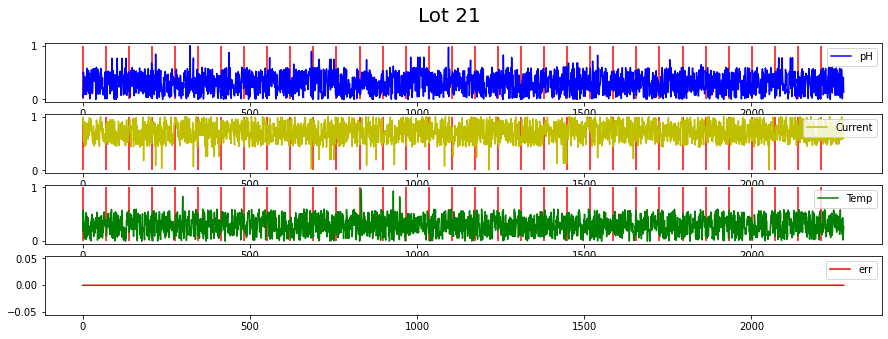

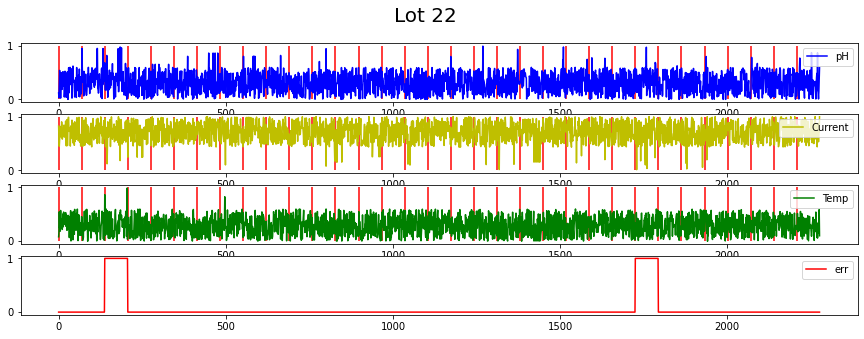

In [63]:
for i in range(1,len(df_sc['Lot'].unique())+1):
  df_eplot = df_sc.loc[df['Lot']==str(i)].reset_index()
  df_eplot['Index'] = np.arange(0,len(df_eplot))

  f, axes = plt.subplots(4)
  f.set_size_inches((15, 5))
  f.suptitle('Lot %s' % i, fontsize = 20)

  axes[0].plot(df_eplot['Index'], df_eplot['pH'], 'b', label='pH')
  axes[0].legend(loc = 'upper right')
  for i in range(0, len(df_eplot), 69):
    axes[0].vlines(df_eplot['Index'][i], 0, 1, color='red')

  axes[1].plot(df_eplot['Index'], df_eplot['Current'], 'y', label='Current')
  axes[1].legend(loc = 'upper right')
  for i in range(0, len(df_eplot), 69):
    axes[1].vlines(df_eplot['Index'][i], 0, 1, color='red')

  axes[2].plot(df_eplot['Index'], df_eplot['Temp'], 'g', label='Temp')
  axes[2].legend(loc = 'upper right')
  for i in range(0, len(df_eplot), 69):
    axes[2].vlines(df_eplot['Index'][i], 0, 1, color='red')

  axes[3].plot(df_eplot['Index'], df_eplot['err'], 'r', label='err')
  axes[3].legend(loc = 'upper right')

  plt.show()

# 새로운 feature 추가

정규화된 데이터 plot을 보았을 때 pH, Temp, current에서 이상 값이 6개 이상 발생한 경우 오류가 날 확률이 높은 것으로 판단


## 이상치 판별

<function matplotlib.pyplot.show>

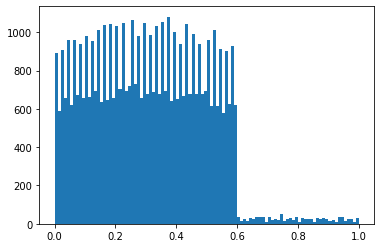

In [148]:
plt.hist(df_sc['pH'], bins =100)
plt.show

pH는 0.6이상을 이상치로 판별

<function matplotlib.pyplot.show>

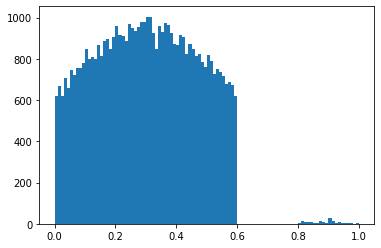

In [149]:
plt.hist(df_sc['Temp'], bins =100)
plt.show

Temp는 0.8이상을 이상치로 판별

<function matplotlib.pyplot.show>

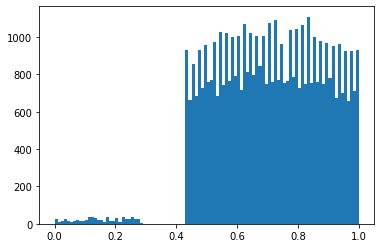

In [150]:
plt.hist(df_sc['Current'], bins =100)
plt.show

Current는 0.3이하를 이상치로 판별

In [151]:
df_sc['pH_out'] = 0
df_sc.loc[df_sc['pH'] > 0.6, 'pH_out'] = 1

df_sc['Temp_out'] = 0
df_sc.loc[df_sc['Temp'] >= 0.8, 'Temp_out'] = 1

df_sc['Current_out'] = 0
df_sc.loc[df_sc['Current'] < 0.3, 'Current_out'] = 1

In [152]:
# 예시 확인
df_sc.loc[df_sc['Temp_out'] == 1]

,Index,Lot,Time,pH,Temp,Current,date,err,pH_out,Temp_out,Current_out
209,210,4,오후 4:39:12.6,0.092742,0.976931,0.195402,2021-09-07,0,0,1,1
621,622,10,오후 5:15:43.6,0.504032,0.919759,0.899425,2021-09-07,0,0,1,0
622,623,10,오후 5:15:48.6,0.504032,0.919759,0.899425,2021-09-07,0,0,1,0
629,630,10,오후 5:16:23.6,0.504032,0.919759,0.899425,2021-09-07,0,0,1,0
670,671,10,오후 5:19:48.9,0.504032,0.919759,0.899425,2021-09-07,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1013,1014,15,오후 5:52:09.6,0.806452,0.976931,0.801724,2021-10-26,1,1,1,0
628,629,10,오후 5:21:01.6,0.141129,0.848546,0.031609,2021-10-27,0,0,1,1
741,742,11,오후 5:30:49.4,0.705645,0.847543,0.853448,2021-10-27,0,1,1,0
1043,1044,16,오후 5:57:48.9,0.439516,0.863591,0.810345,2021-10-27,0,0,1,0


In [153]:
df_sc

,Index,Lot,Time,pH,Temp,Current,date,err,pH_out,Temp_out,Current_out
0,1,1,오후 4:29:15.0,0.346774,0.086259,0.525862,2021-09-06,0,0,0,0
1,2,1,오후 4:29:20.0,0.560484,0.069208,0.790230,2021-09-06,0,0,0,0
2,3,1,오후 4:29:25.0,0.040323,0.036108,0.847701,2021-09-06,0,0,0,0
3,4,1,오후 4:29:30.0,0.326613,0.385155,0.727011,2021-09-06,0,0,0,0
4,5,1,오후 4:29:35.0,0.342742,0.217653,0.494253,2021-09-06,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1513,1514,22,오후 6:39:05.9,0.112903,0.151454,0.873563,2021-10-27,0,0,0,0
1514,1515,22,오후 6:39:10.9,0.008065,0.243731,0.531609,2021-10-27,0,0,0,0
1515,1516,22,오후 6:39:15.9,0.141129,0.454363,0.758621,2021-10-27,0,0,0,0
1516,1517,22,오후 6:39:20.9,0.407258,0.588766,0.706897,2021-10-27,0,0,0,0


## 가설 : 이상치가 7번 이상 발생

In [154]:
df_g = df_sc.iloc[:,[1,6,7,8,9,10]]
df_g.head()

,Lot,date,err,pH_out,Temp_out,Current_out
0,1,2021-09-06,0,0,0,0
1,1,2021-09-06,0,0,0,0
2,1,2021-09-06,0,0,0,0
3,1,2021-09-06,0,0,0,0
4,1,2021-09-06,0,0,0,0


In [155]:
df_g = df_g.groupby(by=['Lot','date']).sum().reset_index()

In [156]:
df_g

,Lot,date,err,pH_out,Temp_out,Current_out
0,1,2021-09-06,0,0,0,0
1,1,2021-09-07,0,0,0,0
2,1,2021-09-08,69,7,2,2
3,1,2021-09-09,0,0,0,0
4,1,2021-09-10,0,3,0,0
...,...,...,...,...,...,...
721,9,2021-10-21,0,0,4,0
722,9,2021-10-22,0,0,0,4
723,9,2021-10-25,0,4,0,0
724,9,2021-10-26,0,2,0,2


In [157]:
df_g['Total'] = df_g['pH_out'] + df_g['Temp_out'] + df_g['Current_out']
df_g.loc[df_g['err'] == 69, 'err'] = 1
df_g

,Lot,date,err,pH_out,Temp_out,Current_out,Total
0,1,2021-09-06,0,0,0,0,0
1,1,2021-09-07,0,0,0,0,0
2,1,2021-09-08,1,7,2,2,11
3,1,2021-09-09,0,0,0,0,0
4,1,2021-09-10,0,3,0,0,3
...,...,...,...,...,...,...,...
721,9,2021-10-21,0,0,4,0,4
722,9,2021-10-22,0,0,0,4,4
723,9,2021-10-25,0,4,0,0,4
724,9,2021-10-26,0,2,0,2,4


In [158]:
df_g['t_err'] = 0
df_g.loc[df_g['Total'] > 6, 't_err'] = 1
df_g

,Lot,date,err,pH_out,Temp_out,Current_out,Total,t_err
0,1,2021-09-06,0,0,0,0,0,0
1,1,2021-09-07,0,0,0,0,0,0
2,1,2021-09-08,1,7,2,2,11,1
3,1,2021-09-09,0,0,0,0,0,0
4,1,2021-09-10,0,3,0,0,3,0
...,...,...,...,...,...,...,...,...
721,9,2021-10-21,0,0,4,0,4,0
722,9,2021-10-22,0,0,0,4,4,0
723,9,2021-10-25,0,4,0,0,4,0
724,9,2021-10-26,0,2,0,2,4,0


### 가설 예측

In [159]:
from sklearn.metrics import classification_report

print(classification_report(df_g['err'], df_g['t_err'], target_names=['0','1']))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       711
           1       0.42      0.93      0.58        15

    accuracy                           0.97       726
   macro avg       0.71      0.95      0.78       726
weighted avg       0.99      0.97      0.98       726



전체 데이터로 비교해보았을 때 성능이 괜찮은 것으로 보임

모델을 함수로 만들어 보기로 함

### 모델 함수 만들어 보기

In [160]:
def JE_model(dataframe):
  # 이상치 컬럼 추가
  dataframe['pH_out'] = 0
  dataframe.loc[dataframe['pH'] > 0.6, 'pH_out'] = 1

  dataframe['Temp_out'] = 0
  dataframe.loc[dataframe['Temp'] >= 0.8, 'Temp_out'] = 1

  dataframe['Current_out'] = 0
  dataframe.loc[dataframe['Current'] < 0.3, 'Current_out'] = 1

  # 필요한 컬럼만 추출
  df_g = dataframe.iloc[:,[1,6,7,8,9,10]]
  # groupby함수 사용해 날짜별 lot 데이터프레임 생성
  df_g = df_g.groupby(by=['Lot','date']).sum().reset_index()

  # total 이상치 발생횟수
  df_g['Total'] = df_g['pH_out'] + df_g['Temp_out'] + df_g['Current_out']
  df_g.loc[df_g['err'] == 69, 'err'] = 1

  # 이상치 발생횟수가 7이상일때 err로 예측
  df_g['t_err'] = 0
  df_g.loc[df_g['Total'] >= 7, 't_err'] = 1 

  return df_g

In [161]:
dfsc_copy = df_sc.copy()
trainsc_copy = train_sc.copy()
valsc_copy = val_sc.copy()
testsc_copy = test_sc.copy()

df_model = JE_model(dfsc_copy)
train_model = JE_model(trainsc_copy)
val_model = JE_model(valsc_copy)
test_model = JE_model(testsc_copy)

### score

In [162]:
print('df')
print(classification_report(df_model['err'], df_model['t_err'], target_names=['0','1']))
print('train')
print(classification_report(train_model['err'], train_model['t_err'], target_names=['0','1']))
print('val')
print(classification_report(val_model['err'], val_model['t_err'], target_names=['0','1']))
print('test')
print(classification_report(test_model['err'], test_model['t_err'], target_names=['0','1']))

df
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       711
           1       0.42      0.93      0.58        15

    accuracy                           0.97       726
   macro avg       0.71      0.95      0.78       726
weighted avg       0.99      0.97      0.98       726

train
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       408
           1       0.45      0.90      0.60        10

    accuracy                           0.97       418
   macro avg       0.72      0.94      0.79       418
weighted avg       0.98      0.97      0.98       418

val
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       151
           1       0.25      1.00      0.40         3

    accuracy                           0.94       154
   macro avg       0.62      0.97      0.68       154
weighted avg       0.99      0.94      0.96       154

test
 

In [163]:
y_ = test_model.loc[test_model['t_err'] == 1]
len(y_)

15

1로 예측한 경우가 많은 것으로 보임


## 가설 : 이상치가 9번 이상 발생

### 모델 함수 만들어 보기

In [164]:
def JE_model(dataframe):
  # 이상치 컬럼 추가
  dataframe['pH_out'] = 0
  dataframe.loc[dataframe['pH'] > 0.6, 'pH_out'] = 1

  dataframe['Temp_out'] = 0
  dataframe.loc[dataframe['Temp'] >= 0.8, 'Temp_out'] = 1

  dataframe['Current_out'] = 0
  dataframe.loc[dataframe['Current'] < 0.3, 'Current_out'] = 1

  # 필요한 컬럼만 추출
  df_g = dataframe.iloc[:,[1,6,7,8,9,10]]
  # groupby함수 사용해 날짜별 lot 데이터프레임 생성
  df_g = df_g.groupby(by=['Lot','date']).sum().reset_index()

  # total 이상치 발생횟수
  df_g['Total'] = df_g['pH_out'] + df_g['Temp_out'] + df_g['Current_out']
  df_g.loc[df_g['err'] == 69, 'err'] = 1

  # 이상치 발생횟수가 9이상일때 err로 예측
  df_g['t_err'] = 0
  df_g.loc[df_g['Total'] >= 9, 't_err'] = 1 

  return df_g

In [165]:
dfsc_copy = df_sc.copy()
trainsc_copy = train_sc.copy()
valsc_copy = val_sc.copy()
testsc_copy = test_sc.copy()

df_model = JE_model(dfsc_copy)
train_model = JE_model(trainsc_copy)
val_model = JE_model(valsc_copy)
test_model = JE_model(testsc_copy)

### score

In [166]:
print('df')
print(classification_report(df_model['err'], df_model['t_err'], target_names=['0','1']))
print('train')
print(classification_report(train_model['err'], train_model['t_err'], target_names=['0','1']))
print('val')
print(classification_report(val_model['err'], val_model['t_err'], target_names=['0','1']))
print('test')
print(classification_report(test_model['err'], test_model['t_err'], target_names=['0','1']))

df
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       711
           1       1.00      0.73      0.85        15

    accuracy                           0.99       726
   macro avg       1.00      0.87      0.92       726
weighted avg       0.99      0.99      0.99       726

train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      0.80      0.89        10

    accuracy                           1.00       418
   macro avg       1.00      0.90      0.94       418
weighted avg       1.00      1.00      0.99       418

val
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       151
           1       0.43      1.00      0.60         3

    accuracy                           0.97       154
   macro avg       0.71      0.99      0.79       154
weighted avg       0.99      0.97      0.98       154

test
 

In [167]:
y_ = test_model.loc[test_model['t_err'] == 1]
len(y_)

3

precision 성능은 오르지만 recall 성능이 떨어지는 것으로 보임

## 이상치 판별범위 수정
- 범위 줄여보기

<function matplotlib.pyplot.show>

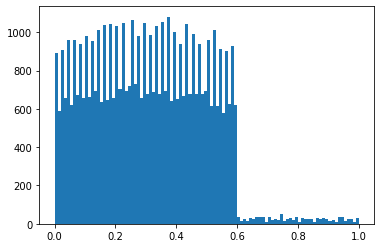

In [168]:
plt.hist(df_sc['pH'], bins =100)
plt.show

### 모델 함수 만들어 보기

In [169]:
def JE_model(dataframe):
  # 이상치 컬럼 추가
  dataframe['pH_out'] = 0
  dataframe.loc[dataframe['pH'] > 0.7, 'pH_out'] = 1

  dataframe['Temp_out'] = 0
  dataframe.loc[dataframe['Temp'] >= 0.8, 'Temp_out'] = 1

  dataframe['Current_out'] = 0
  dataframe.loc[dataframe['Current'] < 0.3, 'Current_out'] = 1

  # 필요한 컬럼만 추출
  df_g = dataframe.iloc[:,[1,6,7,8,9,10]]
  # groupby함수 사용해 날짜별 lot 데이터프레임 생성
  df_g = df_g.groupby(by=['Lot','date']).sum().reset_index()

  # total 이상치 발생횟수
  df_g['Total'] = df_g['pH_out'] + df_g['Temp_out'] + df_g['Current_out']
  df_g.loc[df_g['err'] == 69, 'err'] = 1

  # 이상치 발생횟수가 7이상일때 err로 예측
  df_g['t_err'] = 0
  df_g.loc[df_g['Total'] >= 7, 't_err'] = 1 

  return df_g

In [170]:
dfsc_copy = df_sc.copy()
trainsc_copy = train_sc.copy()
valsc_copy = val_sc.copy()
testsc_copy = test_sc.copy()

df_model = JE_model(dfsc_copy)
train_model = JE_model(trainsc_copy)
val_model = JE_model(valsc_copy)
test_model = JE_model(testsc_copy)

### score

In [171]:
print('df')
print(classification_report(df_model['err'], df_model['t_err'], target_names=['0','1']))
print('train')
print(classification_report(train_model['err'], train_model['t_err'], target_names=['0','1']))
print('val')
print(classification_report(val_model['err'], val_model['t_err'], target_names=['0','1']))
print('test')
print(classification_report(test_model['err'], test_model['t_err'], target_names=['0','1']))

df
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       711
           1       0.50      0.80      0.62        15

    accuracy                           0.98       726
   macro avg       0.75      0.89      0.80       726
weighted avg       0.99      0.98      0.98       726

train
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       408
           1       0.56      0.90      0.69        10

    accuracy                           0.98       418
   macro avg       0.78      0.94      0.84       418
weighted avg       0.99      0.98      0.98       418

val
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       151
           1       0.40      0.67      0.50         3

    accuracy                           0.97       154
   macro avg       0.70      0.82      0.74       154
weighted avg       0.98      0.97      0.98       154

test
 

In [172]:
y_ = test_model.loc[test_model['t_err'] == 1]
len(y_)

11

성능이 매우 떨어짐

# 가설 결론

이상치 pH > 0.6 , Temp >= 0.8, Current < 0.3 이고, 총 이상치 발생 횟수가 7번 이상일때 모델이 가장 최적으로 보임

# Isolation Forest

## X, Y 넘파이배열 생성

In [173]:
def JE_model(dataframe):
  # 이상치 컬럼 추가
  dataframe['pH_out'] = 0
  dataframe.loc[dataframe['pH'] > 0.6, 'pH_out'] = 1

  dataframe['Temp_out'] = 0
  dataframe.loc[dataframe['Temp'] >= 0.8, 'Temp_out'] = 1

  dataframe['Current_out'] = 0
  dataframe.loc[dataframe['Current'] < 0.3, 'Current_out'] = 1

  # 필요한 컬럼만 추출
  df_g = dataframe.iloc[:,[1,6,7,8,9,10]]
  # groupby함수 사용해 날짜별 lot 데이터프레임 생성
  df_g = df_g.groupby(by=['Lot','date']).sum().reset_index()

  # total 이상치 발생횟수
  df_g['Total'] = df_g['pH_out'] + df_g['Temp_out'] + df_g['Current_out']
  df_g.loc[df_g['err'] == 69, 'err'] = 1

  # 이상치 발생횟수가 7이상일때 err로 예측
  df_g['t_err'] = 0
  df_g.loc[df_g['Total'] >= 7, 't_err'] = 1 

  return df_g

In [174]:
dfsc_copy = df_sc.copy()
trainsc_copy = train_sc.copy()
valsc_copy = val_sc.copy()
testsc_copy = test_sc.copy()

df_model = JE_model(dfsc_copy)
train_model = JE_model(trainsc_copy)
val_model = JE_model(valsc_copy)
test_model = JE_model(testsc_copy)

In [175]:
train_model

,Lot,date,err,pH_out,Temp_out,Current_out,Total,t_err
0,1,2021-09-06,0,0,0,0,0,0
1,1,2021-09-07,0,0,0,0,0,0
2,1,2021-09-08,1,7,2,2,11,1
3,1,2021-09-09,0,0,0,0,0,0
4,1,2021-09-10,0,3,0,0,3,0
...,...,...,...,...,...,...,...,...
413,22,2021-09-29,0,0,0,0,0,0
414,22,2021-09-30,0,0,0,2,2,0
415,22,2021-10-01,0,0,0,0,0,0
416,22,2021-10-05,0,1,0,0,1,0


In [176]:
df_x = df_model.drop(columns = ['Lot', 'date', 'err', 't_err'])
train_x = train_model.drop(columns = ['Lot', 'date', 'err', 't_err'])
val_x = val_model.drop(columns = ['Lot', 'date', 'err', 't_err'])
test_x = test_model.drop(columns = ['Lot', 'date', 'err', 't_err'])

In [177]:
train_x.head()

,pH_out,Temp_out,Current_out,Total
0,0,0,0,0
1,0,0,0,0
2,7,2,2,11
3,0,0,0,0
4,3,0,0,3


In [178]:
df_y = df_model.drop(columns = ['Lot', 'date', 'pH_out', 'Temp_out', 'Current_out', 'Total','t_err'])
train_y = train_model.drop(columns = ['Lot', 'date', 'pH_out', 'Temp_out', 'Current_out', 'Total','t_err'])
val_y = val_model.drop(columns = ['Lot', 'date', 'pH_out', 'Temp_out', 'Current_out', 'Total','t_err'])
test_y = test_model.drop(columns = ['Lot', 'date', 'pH_out', 'Temp_out', 'Current_out', 'Total','t_err'])

In [179]:
train_y.head()

,err
0,0
1,0
2,1
3,0
4,0


In [180]:
x_np = train_x.to_numpy()
x_np.shape

(418, 4)

In [181]:
vx_np = val_x.to_numpy()
vx_np.shape

(154, 4)

In [182]:
tx_np = test_x.to_numpy()
tx_np.shape

(154, 4)

In [183]:
y_np = train_y.to_numpy()
y_np = y_np.reshape(-1, 1)
y_np.shape

(418, 1)

In [184]:
vy_np = val_y.to_numpy()
vy_np.shape

(154, 1)

In [185]:
ty_np = test_y.to_numpy()
ty_np.shape

(154, 1)

In [186]:
from sklearn.ensemble import IsolationForest
IF = IsolationForest(random_state=0, n_estimators=1, contamination='auto')
IF.fit(x_np, y_np)
y_ = IF.predict(tx_np)

In [187]:
y_ = np.abs(y_-1)/2
y_ = y_.astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [188]:
# for i in [0,10,20,30,40,50,70]:
#   IF 


y_

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0])